# Twitter Sentiment Analysis using NLTK

In [97]:
# ! pip install nltk
# ! pip install utils

In [6]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import seaborn as sns

import random                              # pseudo-random number generator

import pandas as pd

In [7]:
# download sample twitter dataset.
# nltk.download('twitter_samples')

* The dataset contains 5000 positive and 5000 negative manually anoted tweets.
* It is balanced in order to simplify the desing of most computational methods that are required for sentiment analysis

# Loading and explore dataset

In [8]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [9]:
def df_sentiment(list_text, sentiment):
    """Returns a dataframe with a text and sentiment column"""
    df = pd.DataFrame()
    df['text'] = list_text
    df['sentiment'] = sentiment
    return df

In [10]:
df = df_sentiment(all_negative_tweets, 'negative').append(df_sentiment(all_positive_tweets, 'positive'))
df.head()

,text,sentiment
0,hopeless for tmr :(,negative
1,Everything in the kids section of IKEA is so c...,negative
2,@Hegelbon That heart sliding into the waste ba...,negative
3,"“@ketchBurning: I hate Japanese call him ""bani...",negative
4,"Dang starting next week I have ""work"" :(",negative


In [11]:
count_sentiment = df.sentiment.value_counts().reset_index()
count_sentiment

,index,sentiment
0,positive,5000
1,negative,5000


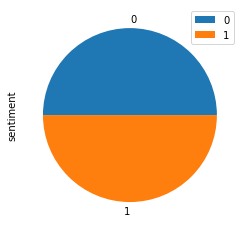

In [12]:
count_sentiment.plot.pie(y='sentiment', x='index');

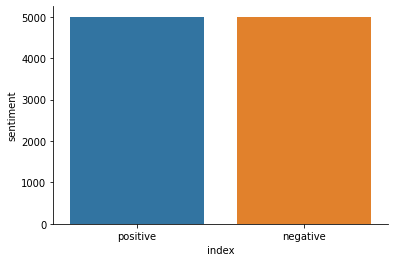

In [13]:
sns.barplot(data=count_sentiment, x='index', y='sentiment')
sns.despine();

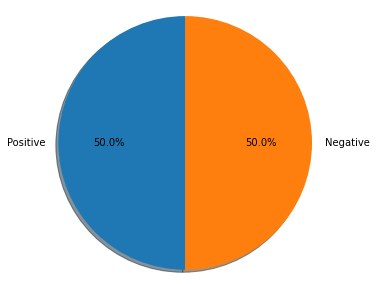

In [14]:
# declare a figure with a custom size
fig = plt.figure(figsize=(5,5))

# label for the two classes
labels = 'Positive', "Negative"

# sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# declare a pie chart, where the slices will be ordered and plotted counter-clockwise
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# display the chart
plt.show()

# Looking at the raw text

In [19]:
# print positive tweets in green
print('\033[92m' + all_positive_tweets[random.randint(0, 5000)])

Yummmyyy.... :-) — eating dosa


In [20]:
# print negative tweets in red
print('\033[91m' + all_negative_tweets[random.randint(0, 5000)])

@frkntrd oh man schade :(


In [21]:
tweet = all_positive_tweets[2277]
tweet

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liviaclarete/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [24]:
# Remove hyperlinks,  Twitter marks and styles

print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [25]:
# tokenize the string

print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [26]:
# Remove stop words and punctuations
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [27]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [28]:
# Stemming

print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [33]:
# process_tweet()

# from utils import process_tweet


# Cleaning text

In [35]:
import sys
path = '/Users/liviaclarete/coding/nlp/preprocessing/'
sys.path.insert(1, path)

In [48]:
from re_clean_list_strings import sub_list_strings_list_regex
from lemmatization import lemmatization

In [49]:
list_of_strings = df.text.to_list()

list_of_regex_values = list(dict_regex.values())

list_of_regex_keys = list(dict_regex.keys())

dict_regex = {
    'hashtags': r'#\w',
    # returns not only mentions, but
    # part of the email after the @
    'mentions': r'@(\w+)',
    'emails': r'',
    'links': r'https?:\/\/.*[\r\n]*',
    'remove_RT': '^RT[\s]+',
    'numbers': r'\d+',
    'symbols': r'',
    'punctionation2': '[^\w\s]',
    'punctionation': '[%s]' % re.escape(string.punctuation),
    'periods': '\.',
    'exclamation points': '\!',
    'question marks': '\?',
    'upper case words': '[A-Z][A-Z\d]+',
    # https://stackoverflow.com/questions/39536390/match-unicode-emoji-in-python-regex
    'emojis': '\d+(.*?)[\u263a-\U0001f645]'  
}

In [52]:
import spacy

nlp = spacy.load('en_core_web_sm')

def lemma_list(list_of_strings, nlp=nlp):
    """
    Apply the lemmatization function to a list of string texts.
    Input:
        list_of_strings: list of strings
        nlp: trained model
    
    Returns:
        list of strings with lemmatized words
    """
    l = []
    for w in list_of_strings:
        l.append(lemmatization(w))

    return l

In [53]:
lemma_list(clean_list)

['hopeless for tmr ',
 'everything in the kid section of ikea be so cute shame i be nearly in month ',
 'that heart slide into the waste basket ',
 'i hate japanese call him bani me too ',
 'dang start next week i have work ',
 'oh god my baby face ',
 'make me smile ',
 'work neighbour on motor ask why and he say hate the update on search ',
 'why sialan ',
 'athabasca glacier be there in thabasca lacier asper aspernationalpark lberta xplorealberta ',
 'i have a really good mampg idea but i be never go to meet them ',
 'mare ivan ',
 'happy trip keep safe see you soon ',
 'i be so tired hahahah ',
 'with knee replacement they get you up amp about the same day ouch ',
 'relate to the sweet n sour kind of bipolar people in your life cuz my life be full of them ',
 'pleasse ',
 'i be not sure tho ',
 'i feel stupid i just can not seem to grasp the basic of digital painting and nothing i have be research be help any ',
 'good lord ',
 'i feel lonely someone talk to me guy and girl ',
 'no

In [47]:
# clean a list of text using sub_list_strings_list_regex
clean_list = sub_list_strings_list_regex(list_of_strings, 
                                         list_of_regex_values)

# normalize tweets
lemma_list = lemmatization()

In [311]:
def load_embeddings(embeddings_path):
    """
    Loads pre-trained word embedding from tsv file.
    Ags:
        embedding_path: path to the embedding file.
    Returns:
        embedding: dict mappint words to vectors;
        embedding_dim: dimention of the vectors.
    """
    
    starspace_embeddings = {}
    dim = 0
    for line in open(embeddings_path):
        word, *vec = line.strip().split()
        vf = []
        dim = len(vec)
        for v in vec:
            # print(v)
            vf.append(float(v))
        starspace_embeddings[word] = np.array(vf, dtype=np.float32)
    
    return starspace_embeddings, dim
        # pass

In [312]:
def question_to_vec(question, embedding, dim):
    """Transforms a string to an embedding by averaging word embeddings."""
    
    vec = np.zeros((dim), dtype=np.float)
    count = 0

In [313]:
df['clean'] = df.text.apply(clean_text_df)#, args=stopwords_english)
df['clean_2'] = df.text.apply(text_prepare)

In [314]:
def word_freq(col, common=True):
    if common==True:
        return pd.Series(' '.join(col.split())).value_counts()[:20]
    else:
        return pd.Series(' '.join(col.split())).value_counts()[-20:]
        

In [315]:
# df.text.apply(word_freq)

In [323]:
def word_freq(df, col, x):
    """Count the most frequent words"""
    freq = pd.Series(' '.join(df[col]).split()).value_counts().reset_index()
    freq.columns = ['word', 'count']
    freq = freq[freq['count'] > x]
    return freq


In [322]:
word_freq(df, 'clean', x=1)

,word,count
0,im,711
1,thanks,447
2,like,421
3,love,407
4,follow,387
...,...,...
4703,vision,2
4704,deserves,2
4705,impeccable,2
4706,angelica,2


In [319]:
df.iloc[-10, -1]

'niallll_1dx cool video love thank u'

In [265]:
uncommon_after = pd.Series(' '.join(df['text']).split()).value_counts()[-10:]

In [266]:
uncommon_after

much?"                     1
http://t.co/TPwmADzibD     1
SaSin                      1
yk                         1
tho..                      1
@Darlene_Vibares           1
@MattPascual               1
https://t.co/qZm1Hbxtha    1
Coffee                     1
@subsubjjang               1
dtype: int64

In [1]:
all_positive_tweets

NameError: name 'all_positive_tweets' is not defined